# Project: Wrangling and Analyze Data

In [1]:
#load packages
import pandas as pd
import numpy as np
import re

import requests
import os
#import tweepy
import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from wordcloud import WordCloud

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#load twitter archive dataset into a data frame
#read None values as NaN
twitter_archive = pd.read_csv('data/twitter-archive-enhanced.csv', 
                              na_values={'name':['None'],
                                         'doggo':['None'],
                                         'floofer':['None'],
                                         'pupper':['None'],
                                         'puppo':['None']})
print(twitter_archive.shape)
twitter_archive.sample(5)

(2356, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
522,809808892968534016,NaN,NaN,2016-12-16 17:14:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Maximus. His face is st...,7.939622e+17,4.196984e+09,2016-11-02 23:45:19 +0000,https://twitter.com/dog_rates/status/793962221...,12,10,Maximus,NaN,NaN,NaN,NaN
382,827228250799742977,NaN,NaN,2017-02-02 18:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Phil. He's an important...,6.946697e+17,4.196984e+09,2016-02-02 23:52:22 +0000,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,NaN,NaN,NaN,NaN
370,828409743546925057,NaN,NaN,2017-02-06 01:07:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mutt Ryan. He's quite confident at the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828409743...,12,10,Mutt,NaN,NaN,NaN,NaN
104,872261713294495745,NaN,NaN,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,NaN,NaN,NaN,NaN
1157,724405726123311104,NaN,NaN,2016-04-25 01:12:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ashleigh. She's having Coachella withd...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724405726...,10,10,Ashleigh,NaN,NaN,pupper,NaN


In [3]:
#twitter_archive.timestamp.value_counts()

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#Create a request to get tweet image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder_name = 'data'

In [5]:
#Access the contents in the response and write to file
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [6]:
#load the contents into a data frame
image_predictions = pd.read_csv('data/image-predictions.tsv', sep='\t')
print(image_predictions.shape)
image_predictions.head()

(2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

Gather each tweet's __retweet count__ and __favorite count__

In [7]:
#create an empty dictionary
tweet_dict = {}

In [8]:
#read the tweets text file line by line and add favorite_count and retweet_count to data frame
count = 0
with open('data/tweet-json.txt', 'r') as file:
    #for every line in tweet text file, get the json
    for line in file:
        tweets_json = json.loads(line)
        
        #retrieve favorite_count and retweet_count
        tweet_id = tweets_json['id']
        favorites = tweets_json['favorite_count']
        retweets = tweets_json['retweet_count']
        
        #append to dictionary
        tweet_dict[count] = (tweet_id, favorites, retweets)
        count = count + 1  

#file.close()    

In [9]:
#print(tweet_id)
#print(favorites)
#print(retweets)
#print(type(tweet_dict))

In [10]:
#print(tweet_dict)

In [11]:
#create dataframe from dict
tweet_counts_df = pd.DataFrame(tweet_dict)
tweet_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2344,2345,2346,2347,2348,2349,2350,2351,2352,2353
0,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256,891087950875897856,890971913173991426,890729181411237888,890609185150312448,890240255349198849,...,666058600524156928,666057090499244032,666055525042405380,666051853826850816,666050758794694657,666049248165822465,666044226329800704,666033412701032449,666029285002620928,666020888022790149
1,39467,33819,25461,42908,41048,20562,12041,56848,28226,32467,...,115,304,448,1253,136,111,311,128,132,2535
2,8853,6514,4328,8964,9774,3261,2158,16716,4429,7711,...,61,146,261,879,60,41,147,47,48,532


In [12]:
#writing rows 0,1,2 as columns
tweet_counts_df = tweet_counts_df.transpose()

In [13]:
tweet_counts_df.tail(10)

,0,1,2
2344,666058600524156928,115,61
2345,666057090499244032,304,146
2346,666055525042405380,448,261
2347,666051853826850816,1253,879
2348,666050758794694657,136,60
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


_________________

## Assessing Data

In [14]:
#Create function for getting summary of data using pandas methods
def wrangle(df):
    
    #print the shape of the dataframe
    print("shape: {}".format(df.shape))
    
    #print the number of duplicate rows in the dataframe
    print("# duplicate rows: {}".format(df.duplicated().sum()))
    
    #print the maximum number of null values in the dataframe
    print("# null values: {}".format(df.isnull().sum().max()))
    
    #print the number of unique values
    print("unique non null values:")
    print(df.nunique())
    
    #print the data frame information
    print(df.info())

In [15]:
#twitter archive data summary
wrangle(twitter_archive)

shape: (2356, 17)
# duplicate rows: 0
# null values: 2346
unique non null values:
tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           956
doggo                            1
floofer                          1
pupper                           1
puppo                            1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id      

In [16]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

In [17]:
#number of invalid rating denominators i.e that are not 10
twitter_archive.query('rating_denominator > 10 or rating_denominator == 0').rating_denominator.value_counts().sum()

21

In [18]:
#number of tweets that are retweets
twitter_archive.retweeted_status_id.value_counts().sum()

181

In [19]:
#number of tweets that are replies
mask = twitter_archive[twitter_archive.in_reply_to_status_id.notnull()].index
mask.value_counts().sum()

78

77 tweets are replies. 1 row with tweet id = 669353438988365824 is not a reply.(row id 2169)

In [20]:
#tweets that are replies
reply_mask = twitter_archive.in_reply_to_user_id.notnull()
twitter_archive[reply_mask].tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,NaN,NaN,NaN,NaN
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,NaN,NaN,NaN,NaN,NaN


In [21]:
#image predictions data summary
wrangle(image_predictions)

shape: (2075, 12)
# duplicate rows: 0
# null values: 0
unique non null values:
tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
me

In [22]:
#image_predictions.to_csv('image_predictions.csv')

In [23]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
#tweet_counts_df data summary
wrangle(tweet_counts_df)

shape: (2354, 3)
# duplicate rows: 0
# null values: 0
unique non null values:
0    2354
1    2007
2    1724
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2354 non-null   int64
 1   1       2354 non-null   int64
 2   2       2354 non-null   int64
dtypes: int64(3)
memory usage: 138.1 KB
None


### Quality issues

`twitter_archive:`
1.  missing retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp stored as NaN

2.  missing in_reply_to_status_id, in_reply_to_user_id stored as NaN

3.  some tweets are not dog ratings

4.  some dogs are missing names

5.  dog stages have missing values

6.  timestamp and retweeted_status_timestamp stored as string

7.  21 tweets have an invalid denominator rating


`tweet_counts_df:`

8.  column names are not meaningful 

### Tidiness issues
9.  `twitter_archive:` doggo, floofer, pupper, puppo(dog stages) stored as columns while they are not variables


10.  `image_predictions:` Columns index 3-11 are structured as columns.

_________

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
#TO DELETE: Start with completeness i.e. cleaning missing values. Reference: Lesson 4.9
#Address Tidiness After Structural Issues and Before Content Issues. Reference: Lesson 4.12
#Lastly, clean for quality.  Reference: Lesson 4.15

In [26]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_counts_clean = tweet_counts_df.copy()

### Issue #1:`twitter_archive:` missing values in  retweet columns

#### Define:
- remove rows with which have a retweeted_status_id
- remove retweets columns as they are not relevant

#### Code

In [27]:
#drop rows with a retweeted_status_id
retweets_ids = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()].index
twitter_archive_clean.drop(retweets_ids, axis = 0, inplace = True)

In [28]:
#drop the retweet columns
twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis = 1, 
                           inplace = True)

#### Test

In [29]:
twitter_archive_clean.shape

(2175, 14)

In [30]:
#looking at the data summary
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   1495 non-null   object 
 10  doggo                  87 non-null     object 
 11  floofer                10 non-null     object 
 12  pupper                 234 non-null    object 
 13  puppo                  25 non-null     object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

    181 rows dropped and 3 columns dropped on twitter archive dataset. missing retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp is resolved 

### Issue #2:`twitter_archive:` missing values in reply columns

#### Define
- remove rows with an in_reply_to_status_id. __Limitation: row id = 2169 is actually a dog but it is now excluded__
- remove columns in_reply_to_status_id and in_reply_to_user_id

#### Code

In [31]:
#drop rows with a in_reply_to_status_id
reply_ids =  twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.notnull()].index
twitter_archive_clean.drop(reply_ids, axis = 0, inplace = True)

In [32]:
#drop the tweet replies columns
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis = 1, inplace = True)

#### Test

In [33]:
twitter_archive_clean.shape

(2097, 12)

In [34]:
#looking at the data summary
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                1494 non-null   object
 8   doggo               83 non-null     object
 9   floofer             10 non-null     object
 10  pupper              230 non-null    object
 11  puppo               24 non-null     object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


    77 rows dropped and missing values on in_reply_to_status_id and in_reply_to_user_id resolved. Limitation: tweet with name 'Tessa' will not be included in analysis. There are now 3 missing expanded urls

### Issue #3:`twitter_archive:` some tweets are not dog ratings

#### Define
- remove rows with text that contains ('We rate dogs','we only rate dogs', 'this is not'). These are not dogs.

#### Code

In [35]:
#drop rows which are not dog ratings based on tweet containing 'We only rate dogs'
index_not_dogs1 = twitter_archive_clean[twitter_archive_clean['text'].str.find('We only rate dogs') > 0].index
twitter_archive_clean.drop(index_not_dogs1, axis = 0, inplace = True)

In [36]:
#drop rows which are not dog ratings based on tweet containing 'We only rate dogs'
index_not_dogs2 = twitter_archive_clean[twitter_archive_clean['text'].str.find('We only rate dogs') > 0].index
twitter_archive_clean.drop(index_not_dogs2, axis = 0, inplace = True)

In [37]:
#drop rows which are not dog ratings based on tweet containing 'This is not'
index_not_dogs3 = twitter_archive_clean[twitter_archive_clean['text'].str.find('This is not') > 0].index
twitter_archive_clean.drop(index_not_dogs3, axis = 0, inplace = True)

In [38]:
#twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.index == 375 or twitter_archive_clean.index == 707 or twitter_archive_clean.index == 1445]

#### Test

In [39]:
#looking at the data summary
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2064 non-null   int64 
 1   timestamp           2064 non-null   object
 2   source              2064 non-null   object
 3   text                2064 non-null   object
 4   expanded_urls       2061 non-null   object
 5   rating_numerator    2064 non-null   int64 
 6   rating_denominator  2064 non-null   int64 
 7   name                1481 non-null   object
 8   doggo               83 non-null     object
 9   floofer             10 non-null     object
 10  pupper              230 non-null    object
 11  puppo               24 non-null     object
dtypes: int64(3), object(9)
memory usage: 209.6+ KB


### Issue #4:`twitter_archive:` some dogs are missing names.

#### Define
- Extract some names from the text columns i.e. extract text after 'Named ' and 'Name is '
- replace all NaN names with the most frequent name __'a'__

#### Code

In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2064 non-null   int64 
 1   timestamp           2064 non-null   object
 2   source              2064 non-null   object
 3   text                2064 non-null   object
 4   expanded_urls       2061 non-null   object
 5   rating_numerator    2064 non-null   int64 
 6   rating_denominator  2064 non-null   int64 
 7   name                1481 non-null   object
 8   doggo               83 non-null     object
 9   floofer             10 non-null     object
 10  pupper              230 non-null    object
 11  puppo               24 non-null     object
dtypes: int64(3), object(9)
memory usage: 209.6+ KB


In [41]:
def replace_names(df, col1, col2, pattern):
    
    for tweet_id in df.index: 
        
        #key for tweet_id and name
        tweet_name_id = df.loc[tweet_id, col1]
        #key for tweet_id and text
        tweet_text_id = df.loc[tweet_id, col2]

        #change the value in x to unknown if not in list1
        if 'named ' in tweet_text_id:
            x = pattern.search(tweet_text_id)
            if x != None:
                df.loc[tweet_id, col1] = x.group().strip('named ')
        elif 'name is ' in tweet_text_id: 
            x = pattern.search(tweet_text_id)
            if x != None:
                df.loc[tweet_id, col1] = x.group().strip('name is ')
            

In [42]:
named_regex =re.compile(r'named ([a-zA-Z]+)')
name_is_regex =re.compile(r'name is ([a-zA-Z]+)')
replace_names(twitter_archive_clean, 'name','text', name_is_regex)
replace_names(twitter_archive_clean, 'name','text', named_regex)

In [43]:
#most frequent name
twitter_archive_clean.name.describe()

count     1489
unique     974
top          a
freq        29
Name: name, dtype: object

In [44]:
#replace all NaN with the most frequent name
twitter_archive_clean.name.fillna('a', inplace = True)

#### Test

In [45]:
#looking at the data summary
twitter_archive_clean.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
expanded_urls            3
rating_numerator         0
rating_denominator       0
name                     0
doggo                 1981
floofer               2054
pupper                1834
puppo                 2040
dtype: int64

In [46]:
#list(twitter_archive_clean.loc[twitter_archive_clean.text.str.contains('name is ')].name)

### Issue #9:`twitter_archive:` doggo, floofer, pupper, puppo(dog stages) stored as columns while they are not variables

#### Define
- Replace NaNs with an empty string
- Transform dog stages columns so that they are observations
- replace 'doggopupper' with 'puppo' because a puppo can be a dog with a both pupper and doggo tendencies
- replace 'doggopuppo' with 'doggo' because a doggo and puppo dog have doggo tendencies


#### Code

In [47]:
#replace nan with empty string using fillna
twitter_archive_clean['doggo'].fillna(' ', inplace = True)
twitter_archive_clean['floofer'].fillna(' ', inplace = True)
twitter_archive_clean['pupper'].fillna(' ', inplace = True)
twitter_archive_clean['puppo'].fillna(' ', inplace = True)

In [48]:
#Create a new column called dog_stages, cocatenate columns and strip spaces
twitter_archive_clean['dog_stages'] = twitter_archive_clean.apply(lambda r: (str(r['doggo'].strip()) + 
                                                                             str(r['floofer'].strip()) + 
                                                                             str(r['pupper'].strip()) + 
                                                                             str(r['puppo'].strip())) , axis = 1)

In [49]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2064 non-null   int64 
 1   timestamp           2064 non-null   object
 2   source              2064 non-null   object
 3   text                2064 non-null   object
 4   expanded_urls       2061 non-null   object
 5   rating_numerator    2064 non-null   int64 
 6   rating_denominator  2064 non-null   int64 
 7   name                2064 non-null   object
 8   doggo               2064 non-null   object
 9   floofer             2064 non-null   object
 10  pupper              2064 non-null   object
 11  puppo               2064 non-null   object
 12  dog_stages          2064 non-null   object
dtypes: int64(3), object(10)
memory usage: 290.3+ KB


In [50]:
#some dogs have 2 stages
twitter_archive_clean.dog_stages.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [51]:
#resolve dogs with two stages
#replace 'doggopupper' with 'puppo' 
#replace 'doggopuppo' with 'doggo' 

twitter_archive_clean.replace(to_replace="doggopuppo",value="doggo", inplace=True)
twitter_archive_clean.replace(to_replace="doggopupper",value="puppo", inplace=True)
twitter_archive_clean.replace(to_replace="doggofloofer",value="doggo", inplace=True)

In [52]:
#drop columns doggo, floofer, pupper, puppo
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

In [53]:
#TO DELETE:twitter_archive_clean.to_csv('melted2.csv')

#### Test

In [54]:
twitter_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
1727,679877062409191424,2015-12-24 04:11:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5,10,Penelope,
1559,688547210804498433,2016-01-17 02:23:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frönq. He got caught stealing a waffle...,https://twitter.com/dog_rates/status/688547210...,9,10,Frönq,
135,866450705531457537,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper
1946,673705679337693185,2015-12-07 03:28:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dot. He found out you only pretended t...,https://twitter.com/dog_rates/status/673705679...,8,10,Dot,
1602,685973236358713344,2016-01-09 23:55:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lorelei. She's contemplating her exist...,https://twitter.com/dog_rates/status/685973236...,11,10,Lorelei,
2206,668631377374486528,2015-11-23 03:25:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Zeek. He is a grey Cumulonimbus. Zeek is ...,https://twitter.com/dog_rates/status/668631377...,5,10,Zeek,
869,761745352076779520,2016-08-06 02:06:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys.. we only rate dogs. Pls don't send any m...,https://twitter.com/dog_rates/status/761745352...,11,10,a,
913,757400162377592832,2016-07-25 02:20:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",She walks herself up and down the train to be ...,https://twitter.com/dog_rates/status/757400162...,13,10,a,
2011,672245253877968896,2015-12-03 02:45:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snickers. He's adorable. Also comes in t-...,https://twitter.com/dog_rates/status/672245253...,12,10,Snickers,
1928,674045139690631169,2015-12-08 01:57:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Herd of wild dogs here. Not sure what they're ...,https://twitter.com/dog_rates/status/674045139...,3,10,a,


In [55]:
twitter_archive_clean.shape

(2064, 9)

In [56]:
twitter_archive_clean.dog_stages.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

### Issue #5:`twitter_archive:` dog stages have missing values

#### Define
- most dog stags have missing values stored as empty string. Replace with second most frequent dog stage

OR

- Extract some dog stage from the text columns i.e. extract 'doggo', 'floofer','floof', 'pupper' or 'pup' 

In [57]:
#extract dog stage from text
for row_id in twitter_archive_clean.index: 
    
    #key for id and name
    dog_stage_id = twitter_archive_clean.loc[row_id, 'dog_stages']
    #key for id and text
    dog_text_id = twitter_archive_clean.loc[row_id,'text']
    pattern = re.compile(r'pupper|puppers|doggo|pup|floofer|pups|Pup|puppo|floof')
    
    y = pattern.search(dog_text_id)
    if y != None:
        twitter_archive_clean.loc[row_id, 'dog_stages'] = y.group()
#df.loc[tweet_id, col1] = x.group().strip('name is ')

In [58]:
#replace pup,pups or Pup with pupper dog state
twitter_archive_clean.replace(to_replace="pup",value="puppo", inplace=True)
twitter_archive_clean.replace(to_replace="pups",value="puppo", inplace=True)
twitter_archive_clean.replace(to_replace="Pup",value="puppo", inplace=True)
twitter_archive_clean.replace(to_replace="floof",value="floofer", inplace=True)

#### Test

In [59]:
twitter_archive_clean.shape

(2064, 9)

In [60]:
twitter_archive_clean.dog_stages.unique()

array(['', 'puppo', 'pupper', 'doggo', 'floofer'], dtype=object)

### Issue #10:`image_predictions:` Columns index 3-11 are structured as columns. Each variable is not a column. Meaningless column names

#### Define
- transfrom ['p1','p2','p3'] columns to rows with tweet_id as index, store into new dataframe
- transfrom ['p1_dog','p2_dog','p3_dog'] columns to rows with tweet_id as index, store into new dataframe
- transfrom ['p1_conf','p2_conf','p3_conf'] columns to rows with tweet_id as index, store into new dataframe
- combine all the above dataframe to form 1 image_predictions_clean dataframe
- renaming columns while tranforming so that image_predictions_clean has meaningful column names
- strip the letter 'p' in p1, p2 and p3 and convert those columns to data type integer

In [61]:
#melt the predictions number and dog type columns
image_predictions_clean_a = pd.melt(image_predictions_clean, id_vars =['tweet_id'], 
                                    value_vars =['p1','p2','p3'],
                                    var_name = 'prediction_num',
                                    value_name='breed_name')
print(image_predictions_clean_a.shape)
image_predictions_clean_a.head()

(6225, 3)


,tweet_id,prediction_num,breed_name
0,666020888022790149,p1,Welsh_springer_spaniel
1,666029285002620928,p1,redbone
2,666033412701032449,p1,German_shepherd
3,666044226329800704,p1,Rhodesian_ridgeback
4,666049248165822465,p1,miniature_pinscher


In [62]:
#melt the columns that indicate whether an image is a dog or not
image_predictions_clean_b = pd.melt(image_predictions_clean, id_vars =['tweet_id'], 
                                    value_vars =['p1_dog','p2_dog','p3_dog'], 
                                    var_name = 'is_dog_num', 
                                    value_name='is_dog')
print(image_predictions_clean_b.shape)
image_predictions_clean_b.head()

(6225, 3)


,tweet_id,is_dog_num,is_dog
0,666020888022790149,p1_dog,True
1,666029285002620928,p1_dog,True
2,666033412701032449,p1_dog,True
3,666044226329800704,p1_dog,True
4,666049248165822465,p1_dog,True


In [63]:
#melt the predictions confidence columns
image_predictions_clean_c = pd.melt(image_predictions_clean, id_vars =['tweet_id'], 
                                    value_vars =['p1_conf','p2_conf','p3_conf'], 
                                    var_name = 'confidence_num', 
                                    value_name='prediction_confidence')
print(image_predictions_clean_c.shape)
image_predictions_clean_c.head()

(6225, 3)


,tweet_id,confidence_num,prediction_confidence
0,666020888022790149,p1_conf,0.465074
1,666029285002620928,p1_conf,0.506826
2,666033412701032449,p1_conf,0.596461
3,666044226329800704,p1_conf,0.408143
4,666049248165822465,p1_conf,0.560311


In [64]:
#combine all the relevant columns to form 1 dataframe
image_predictions_clean = pd.concat([image_predictions_clean_a[['tweet_id','prediction_num','breed_name']], 
                                     image_predictions_clean_b['is_dog'],
                                     image_predictions_clean_c['prediction_confidence']], 
                                    axis=1)
image_predictions_clean

,tweet_id,prediction_num,breed_name,is_dog,prediction_confidence
0,666020888022790149,p1,Welsh_springer_spaniel,True,0.465074
1,666029285002620928,p1,redbone,True,0.506826
2,666033412701032449,p1,German_shepherd,True,0.596461
3,666044226329800704,p1,Rhodesian_ridgeback,True,0.408143
4,666049248165822465,p1,miniature_pinscher,True,0.560311
...,...,...,...,...,...
6220,891327558926688256,p3,German_short-haired_pointer,True,0.175219
6221,891689557279858688,p3,spatula,False,0.040836
6222,891815181378084864,p3,kelpie,True,0.031379
6223,892177421306343426,p3,papillon,True,0.068957


In [65]:
#strip the letter 'p' in p1, p2 and p3 and convert those columns to data type integer
image_predictions_clean.prediction_num = image_predictions_clean.prediction_num.str.strip('p').astype(int)

In [66]:
#Remove rows that are not dogs
image_predictions_clean = image_predictions_clean.query('is_dog == True')

#### Test

In [67]:
image_predictions_clean.sample(10)

,tweet_id,prediction_num,breed_name,is_dog,prediction_confidence
2443,672968025906282496,2,miniature_poodle,True,0.160273
4500,672488522314567680,3,Appenzeller,True,0.077798
6178,882627270321602560,3,Cardigan,True,0.107699
5074,702321140488925184,3,Old_English_sheepdog,True,0.043763
5250,720775346191278080,3,giant_schnauzer,True,0.079067
5197,713177543487135744,3,Great_Dane,True,0.025874
2795,685943807276412928,2,toy_terrier,True,0.114512
1494,783334639985389568,1,Cardigan,True,0.593858
3323,747816857231626240,2,Chihuahua,True,0.029053
2816,687317306314240000,2,Maltese_dog,True,0.091025


In [68]:
#looking at the data summary
print(image_predictions_clean.shape)
image_predictions_clean.info()

(4584, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4584 entries, 0 to 6223
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               4584 non-null   int64  
 1   prediction_num         4584 non-null   int32  
 2   breed_name             4584 non-null   object 
 3   is_dog                 4584 non-null   bool   
 4   prediction_confidence  4584 non-null   float64
dtypes: bool(1), float64(1), int32(1), int64(1), object(1)
memory usage: 165.6+ KB


In [69]:
#replace dashes with underscores for these breed names. 
image_predictions_clean = image_predictions_clean.replace("flat-coated_retriever","flat_coated_retriever")
image_predictions_clean = image_predictions_clean.replace("black-and-tan_coonhound","black_and_tan_coonhound")
#soft-coated_wheaten_terrier

### Issue #6:`twitter_archive:` timestamp stored as string

#### Define
- change timestamp type to datetime

#### Code

In [70]:
#convert to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [71]:
#looking at the data summary
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2064 non-null   int64              
 1   timestamp           2064 non-null   datetime64[ns, UTC]
 2   source              2064 non-null   object             
 3   text                2064 non-null   object             
 4   expanded_urls       2061 non-null   object             
 5   rating_numerator    2064 non-null   int64              
 6   rating_denominator  2064 non-null   int64              
 7   name                2064 non-null   object             
 8   dog_stages          2064 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 225.8+ KB


### Issue #7:`twitter_archive:` 21 tweets have an invalid denominator rating

#### Define:
- Replace invalid ratings with 10

#### Code

In [72]:
#default to 10
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].apply(lambda x: 10 if x > 10 else 10)
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,puppo
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


#### Test

In [73]:
#querying for rating denominators that are not 10
twitter_archive_clean.query('rating_denominator > 10 or rating_denominator == 0').rating_denominator.value_counts().sum()

0

### Issue #8:`tweet_counts_df:`column names in tweets_counts_df are not meaningful

#### Define
- Rename columns 0, 1, 2 as tweet_id, favorites and retweets

In [74]:
#rename columns for more readability
tweet_counts_clean.rename(columns={0: 'tweet_id',1:'favorites',2:'retweets'}, inplace = True)

#### Test

In [75]:
#Looking at first 5 rows of the dataset
tweet_counts_clean.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


__________

### Merge data sets

In [76]:
#tweet_counts_clean.info()

In [77]:
#merge twitter archive with favourite and retweet count
merged_df = twitter_archive_clean.merge(tweet_counts_clean, 
                                        how='left', 
                                        left_on = 'tweet_id', 
                                        right_on = 'tweet_id', 
                                        validate = '1:m', 
                                        suffixes = ('x','y') )
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2063
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2064 non-null   int64              
 1   timestamp           2064 non-null   datetime64[ns, UTC]
 2   source              2064 non-null   object             
 3   text                2064 non-null   object             
 4   expanded_urls       2061 non-null   object             
 5   rating_numerator    2064 non-null   int64              
 6   rating_denominator  2064 non-null   int64              
 7   name                2064 non-null   object             
 8   dog_stages          2064 non-null   object             
 9   favorites           2064 non-null   int64              
 10  retweets            2064 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 193.5+ KB


In [78]:
#merged_df.dog_stages.describe()

In [79]:
#lastly merge with image_predictions
twitter_archive_master = merged_df.merge(image_predictions_clean, 
                                         how='left', 
                                         left_on = 'tweet_id', 
                                         right_on = 'tweet_id', 
                                         validate = '1:m', 
                                         suffixes = ('x','y') )
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,favorites,retweets,prediction_num,breed_name,is_dog,prediction_confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,39467,8853,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,puppo,33819,6514,1.0,Chihuahua,True,0.323581
2,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,puppo,33819,6514,2.0,Pekinese,True,0.090647
3,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,puppo,33819,6514,3.0,papillon,True,0.068957
4,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,25461,4328,1.0,Chihuahua,True,0.716012


In [80]:
twitter_archive_master.shape

(4721, 15)

In [81]:
twitter_archive_master.isnull().sum()

tweet_id                   0
timestamp                  0
source                     0
text                       0
expanded_urls              3
rating_numerator           0
rating_denominator         0
name                       0
dog_stages                 0
favorites                  0
retweets                   0
prediction_num           429
breed_name               429
is_dog                   429
prediction_confidence    429
dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [82]:
# save the final merged dataset to csv
twitter_archive_master.to_csv('data/twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**


In [83]:
#using summary statistics to detect the mean, min and max values of the entire dataset
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,prediction_num,prediction_confidence
count,4.721000e+03,4721.000000,4721.0,4721.000000,4721.000000,4292.000000,4292.000000
mean,7.388224e+17,11.789875,10.0,9100.000212,2800.482737,1.993010,0.272993
std,6.785220e+16,27.416474,0.0,12416.908822,4702.447511,0.813512,0.294563
min,6.660209e+17,0.000000,10.0,81.000000,16.000000,1.000000,0.000001
25%,6.773010e+17,10.000000,10.0,2098.000000,637.000000,1.000000,0.052549
50%,7.120974e+17,11.000000,10.0,4290.000000,1415.000000,2.000000,0.146409
75%,7.931506e+17,12.000000,10.0,11519.000000,3249.000000,3.000000,0.406408
max,8.924206e+17,1776.000000,10.0,132810.000000,79515.000000,3.000000,0.999956


### Q 1: Which dogs are the most rated? What dog types are they? 

__Let us first filter tweets by their first image prediction confidence level and plot the distribution of the 100 highest most rated__

In [84]:
#filter tweets by their first image predition confidence level.
twitter_archive_master = twitter_archive_master.query('prediction_num == 1')
twitter_archive_master.shape

(1435, 15)

   ### Filter tweets by the top 20 highest dog ratings

In [85]:
#20 highest rated by rating denominator
highest_rated = twitter_archive_master.nlargest(20,['rating_numerator'])
highest_rated.describe()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,prediction_num,prediction_confidence
count,2.000000e+01,20.000000,20.0,20.000000,20.000000,20.0,20.000000
mean,7.745921e+17,53.600000,10.0,14758.650000,3894.300000,1.0,0.696202
std,7.866431e+16,42.457905,0.0,15563.531957,4094.525036,0.0,0.242332
min,6.758531e+17,14.000000,10.0,1879.000000,247.000000,1.0,0.281463
25%,7.079125e+17,14.000000,10.0,3028.250000,978.250000,1.0,0.460147
50%,7.682471e+17,44.500000,10.0,5621.500000,1770.000000,1.0,0.815139
75%,8.546608e+17,81.000000,10.0,27880.000000,6898.000000,1.0,0.873184
max,8.902403e+17,165.000000,10.0,50199.000000,16570.000000,1.0,0.999885


In [86]:
#100 highest rated by rating denominator
highest_rated100 = twitter_archive_master.nlargest(100,['rating_numerator'])
highest_rated100.describe()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,prediction_num,prediction_confidence
count,1.000000e+02,100.000000,100.0,100.000000,100.000000,100.0,100.000000
mean,8.488950e+17,21.250000,10.0,28046.290000,7336.770000,1.0,0.679244
std,5.572844e+16,24.705283,0.0,20685.342032,7716.736722,0.0,0.237303
min,6.758531e+17,13.000000,10.0,1879.000000,247.000000,1.0,0.134081
25%,8.310962e+17,13.000000,10.0,15108.500000,3397.500000,1.0,0.469150
50%,8.714562e+17,13.000000,10.0,25712.500000,5128.000000,1.0,0.704762
75%,8.831785e+17,14.000000,10.0,33988.750000,7730.250000,1.0,0.873566
max,8.921774e+17,165.000000,10.0,107956.000000,45849.000000,1.0,0.999885


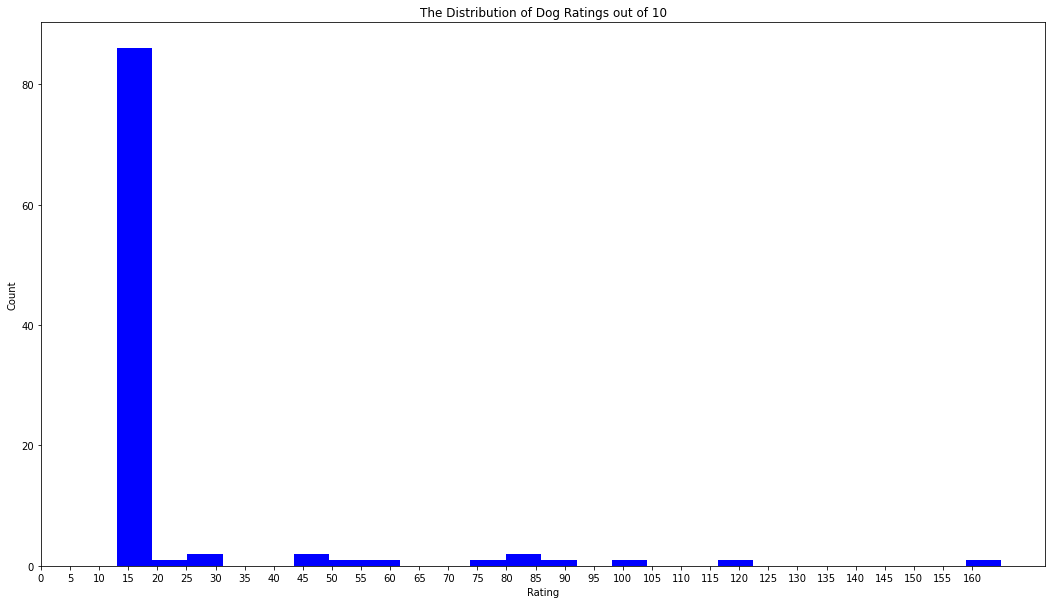

In [87]:
#the distribution of the ratings of the most liked dogs
plt.figure(figsize=[18, 10])
plt.hist(highest_rated100.rating_numerator, color='blue', bins = 25)
plt.title('The Distribution of Dog Ratings out of 10')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(np.arange(0,165, step=5))
#plt.yticks(np.arange(0,, step=1))
plt.show();

   __I have used matplotlib's hist function to plot the rating_numerator(for dog ratings out of 10) of top 100 most liked dogs since the rating is discrete.__
  - The data is highly skewed to the right with a high frequency of rating of 13. 
  - There is also a spike of dogs with rating 14. 


In [88]:
#highest rated by rating numerator
highest_rated.filter(['name','rating_numerator','favorites', 'retweets', 'breed_name','text', 'dog_stages'])


,name,rating_numerator,favorites,retweets,breed_name,text,dog_stages
1663,a,165,5316,2539,Labrador_retriever,Why does this never happen at my front door......,
3193,a,121,4225,1563,soft-coated_wheaten_terrier,Someone help the girl is being mugged. Several...,pupper
2337,a,99,3062,829,golden_retriever,Happy Saturday here's 9 puppers on a bench. 99...,pupper
3635,a,88,2927,1460,Labrador_retriever,Here we have an entire platoon of puppers. Tot...,pupper
795,a,84,13518,3716,West_Highland_white_terrier,The floofs have been released I repeat the flo...,floofer
2390,a,80,2529,636,soft-coated_wheaten_terrier,Here's a brigade of puppers. All look very pre...,pupper
1263,Logan,75,20296,7069,Pomeranian,"This is Logan, the Chow who lived. He solemnly...",
2603,a,60,3201,1028,Great_Pyrenees,Here is a whole flock of puppers. 60/50 I'll ...,pupper
2277,Bluebert,50,2574,247,Siberian_husky,This is Bluebert. He just saw that both #Final...,
2441,a,45,2634,721,borzoi,"From left to right:\nCletus, Jerome, Alejandro...",


###### From the above query we see that an unnamed dog(s) of type Labrador_retriever is the highest rated with a rating of 165/10

##### From the above query we see that Logan, a dog of type Pomeranian is the higest rated with a rating of 75/10

### Q 2: Are the most rated dogs also the most popular/most liked?

   #### Compare dog ratings and favourites of the 100 most liked dogs.

In [89]:
#highest liked by tweet favorites
highest_liked = twitter_archive_master.nlargest(100,['favorites','retweets'])
highest_liked.describe()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,prediction_num,prediction_confidence
count,1.000000e+02,100.000000,100.0,100.000000,100.000000,100.0,100.000000
mean,8.463701e+17,12.660000,10.0,43407.090000,13930.340000,1.0,0.682669
std,4.814822e+16,1.046591,0.0,21824.943421,12120.894694,0.0,0.250516
min,6.671522e+17,5.000000,10.0,27640.000000,4429.000000,1.0,0.120298
25%,8.265204e+17,12.000000,10.0,30216.250000,6922.000000,1.0,0.502656
50%,8.631472e+17,13.000000,10.0,35132.000000,10535.000000,1.0,0.759879
75%,8.815687e+17,13.000000,10.0,46125.000000,16471.750000,1.0,0.916435
max,8.921774e+17,14.000000,10.0,132810.000000,79515.000000,1.0,0.996952


In [90]:
#the top 20 by tweet favorite and retweets
highest_liked.filter(['name','rating_numerator','favorites', 'retweets', 'breed_name','text', 'dog_stages']).head(20)

,name,rating_numerator,favorites,retweets,breed_name,text,dog_stages
757,a,13,132810,48265,Lakeland_terrier,Here's a super supportive puppo participating ...,puppo
1930,a,13,131075,79515,Labrador_retriever,Here's a doggo realizing you can stand in a po...,doggo
143,Duddles,13,107956,45849,English_springer,This is Duddles. He did an attempt. 13/10 some...,
1001,Stephan,13,107015,56625,Chihuahua,This is Stephan. He just wants to help. 13/10 ...,
273,Jamesy,13,106827,32883,French_bulldog,This is Jamesy. He gives a kiss to every other...,pupper
818,Bo,14,95450,42228,standard_poodle,This is Bo. He was a very good First Doggo. 14...,doggo
238,Zoey,13,85011,27680,golden_retriever,This is Zoey. She really likes the planet. Wou...,
2009,a,13,75163,52360,Eskimo_dog,Here's a doggo blowing bubbles. It's downright...,doggo
646,Lilly,13,73397,19297,Labrador_retriever,This is Lilly. She just parallel barked. Kindl...,
162,Aja,13,71144,17300,Chesapeake_Bay_retriever,This is Aja. She was just told she's a good do...,


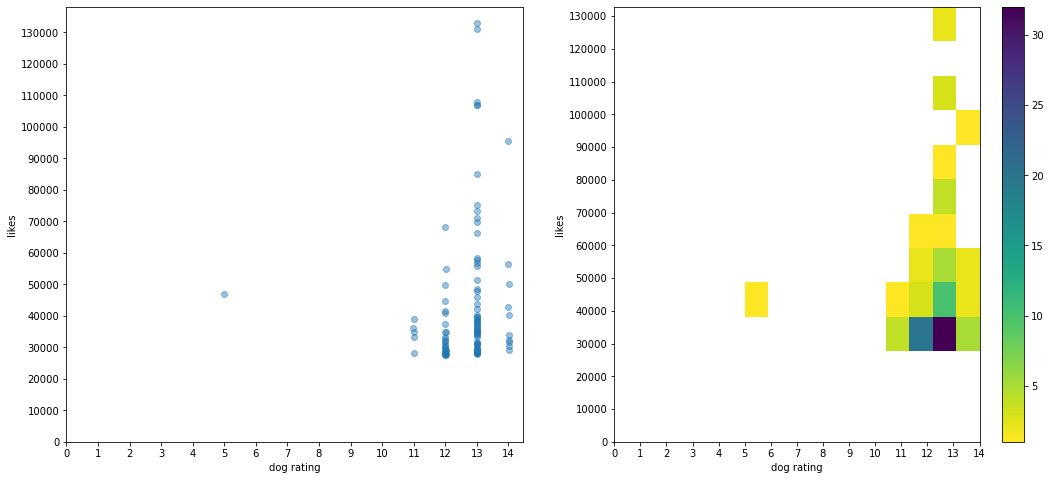

In [91]:
#plots for likes and rating of the top 100 most liked dogs

plt.figure(figsize=[18, 8])

plt.subplot(1, 2, 1)

sb.regplot(data = highest_liked, x = 'rating_numerator', y = 'favorites', x_jitter= 0.01,scatter_kws = {'alpha' : 0.45}, fit_reg = False)
plt.xlabel('dog rating')
plt.ylabel('likes')
plt.xticks(np.arange(0,15, step=1))
plt.yticks(np.arange(0,135000, step=10000))

plt.subplot(1, 2, 2)

plt.hist2d(data = highest_liked, x = 'rating_numerator', y = 'favorites', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('dog rating')
plt.ylabel('likes')
plt.xticks(np.arange(0,15, step=1))
plt.yticks(np.arange(0,135000, step=10000))

plt.show();

   __From the scatter plot and heat plot of the top 100 most liked dogs above:__
   - Most dogs have a rating of 13 and 30 000 to 40 000 likes(area of high frequency in a dark color). 
   - The rating and favorites are not related. There is no noticeable upward or downward trend.
   - A few dogs with a rating of 10 or less have likes of 40 000 and above.
   - There are also a few dogs with an outrageous tweet like(100 000 and above) and a high rating of 13 out of 10

In [92]:
#the top 10 dog breeds by tweet favorite and retweets
highest_liked.breed_name.value_counts().head(10)

golden_retriever      15
Pembroke               9
Labrador_retriever     9
Chihuahua              8
French_bulldog         6
Samoyed                6
Cardigan               3
pug                    3
miniature_pinscher     3
Pomeranian             2
Name: breed_name, dtype: int64

### Q 3: Is there a relationship between dog ratings, favourites and retweets count?

   I have two discrete vaiables 'retweets' and 'favorites' which I will use a heatmap and scatterplot to represent.

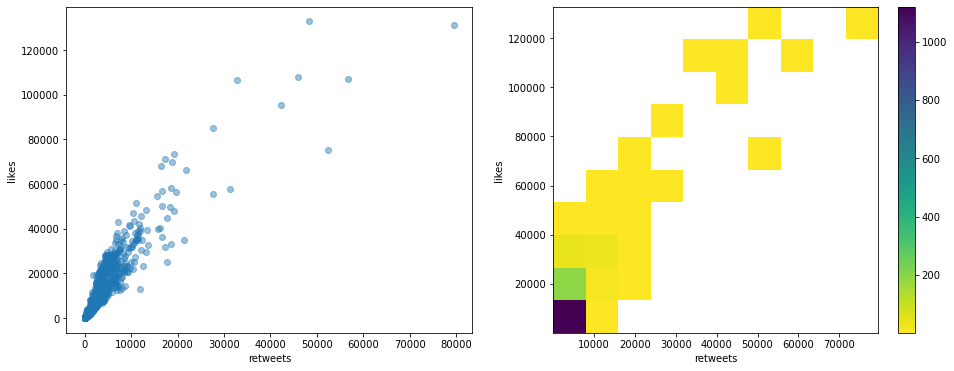

In [93]:
#plots for likes and retweets 

plt.figure(figsize=[16, 6])

plt.subplot(1, 2, 1)

sb.regplot(data = twitter_archive_master, x = 'retweets', y = 'favorites', x_jitter= 0.01,
           scatter_kws = {'alpha' : 0.45}, fit_reg = False)
plt.xlabel('retweets')
plt.ylabel('likes')


plt.subplot(1, 2, 2)

plt.hist2d(data = twitter_archive_master, x = 'retweets', y = 'favorites', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('retweets')
plt.ylabel('likes')

plt.show();

__From the scatter plot and heat plot above:__ 
   - Most dogs have 0 to 40 000 likes and 0 to 10 000 retweets(areas of high frequency). 
   - The tweet retweets and favorites are are positively correlated - as favorites increase so does retweets. 
   - For most tweets likes are higher then retweets.
   - Since favorites and ratings are not related, I conclude that retweets and ratings are not related too

_____

### Insights:
From the above analysis, it can be concluded:
1.	The highest rated dogs are not necessarily the ones with high twitter interactions.

2.	Dogs that that are puppies get the highest interactions.

3.	Dogs predicted to be of the following breeds get the 10 highest twitter engagements:
    -	Golden retrievers, 
    -	Pembroke, 
    -	Labrador retrievers
    -	Chihuahua
    -	French bulldog
    -	Samoyed
    -	Cardigan
    -	Pug
    -	Miniature Pinscher
    -	Pomeranian


_____

### Visualization

In [94]:
#maybe use hexadecimal color codes instead of string names when plotting visuals???. Reference: Lesson 4.17
#analysing visuals: lesson 3.14

In [95]:
#highest_rated_merged.describe()

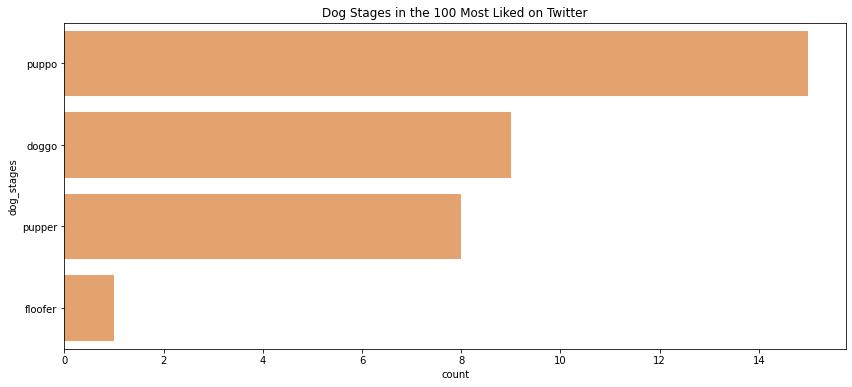

In [96]:
#Horizontal bar chart for dog stages.
nonull_highest_rated = highest_liked.query('dog_stages == "doggo" or dog_stages == "puppo" or dog_stages == "pupper" or dog_stages == "floofer"')
type_order = nonull_highest_rated['dog_stages'].value_counts().index
plt.figure(figsize=[14, 6])
plt.title('Dog Stages in the 100 Most Liked on Twitter')
sb.countplot(data=nonull_highest_rated, y='dog_stages', color='#F89F5B', order=type_order);

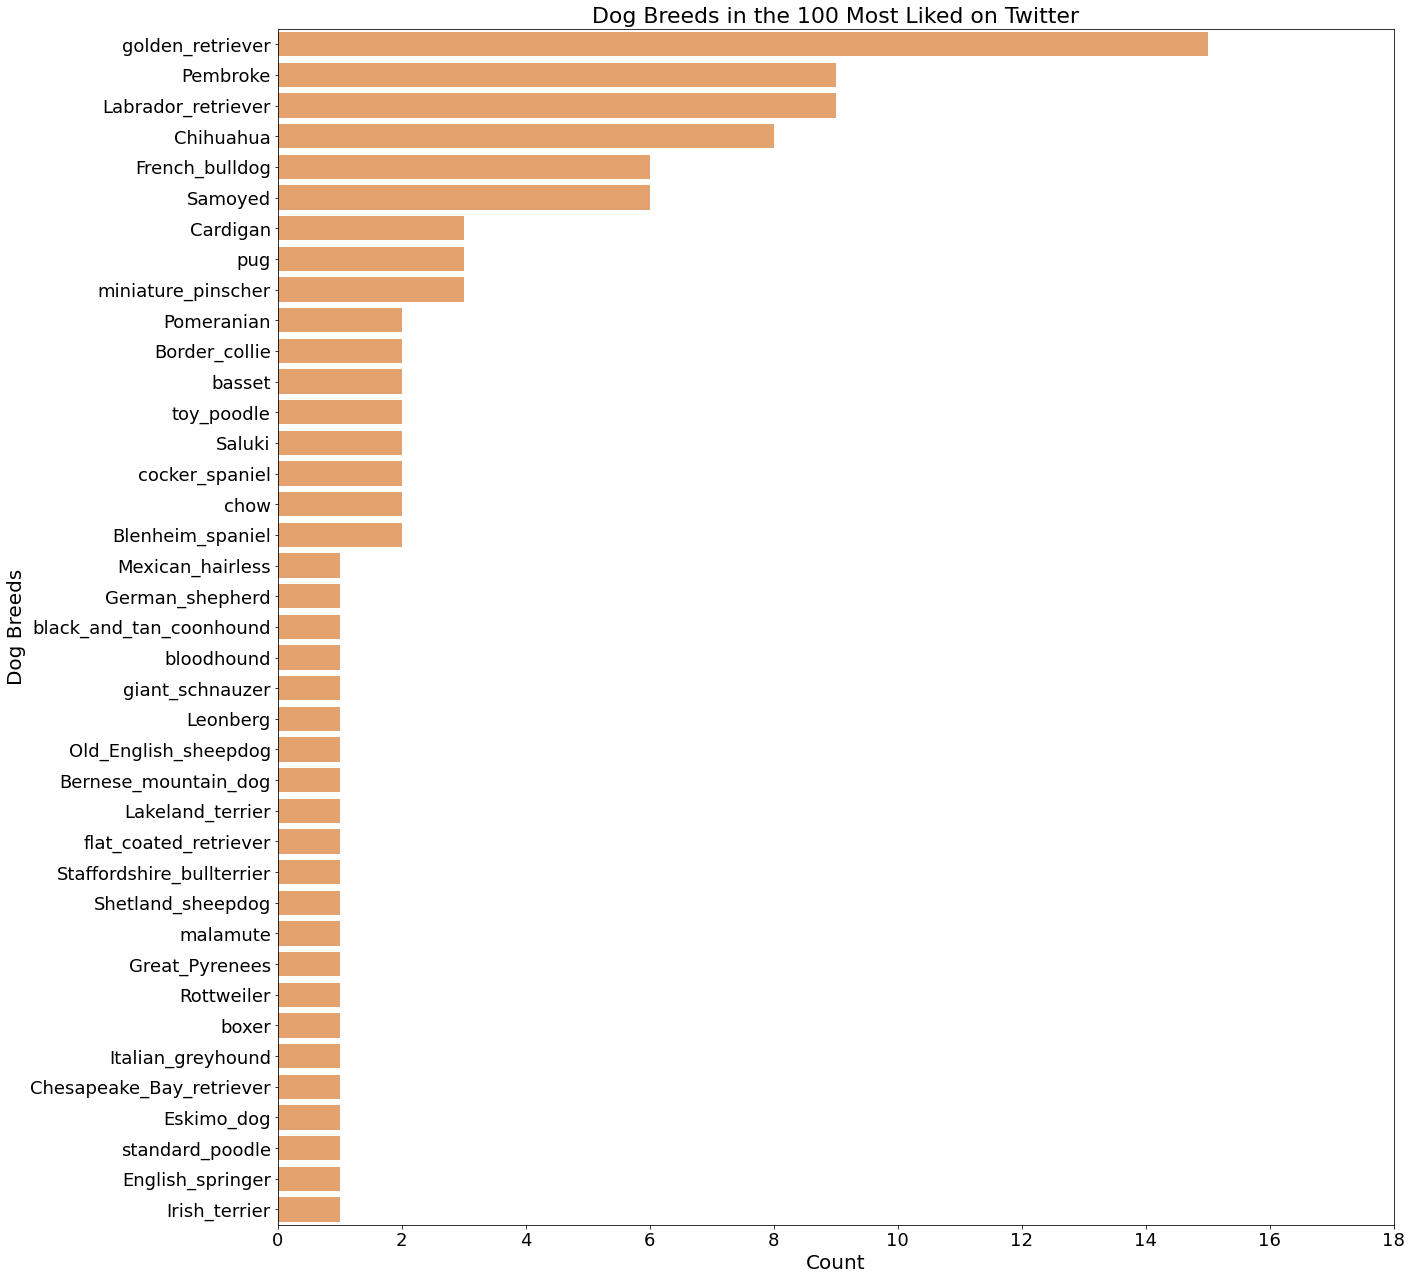

In [97]:
#Horizontal bar chart for most liked dog breeds.
#maybe just show the top 20 only.
#Limitation: These results are depending on the accuracy of the first image prediction confidence
#type_order = highest_rated['breed_name'].value_counts()
type_order1 = highest_liked['breed_name'].value_counts().index
plt.figure(figsize=[20, 22])
sb.countplot(data=highest_liked, y='breed_name', color='#F89F5B', order=type_order1);
plt.xticks(np.arange(0,20, step=2), fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Dog Breeds in the 100 Most Liked on Twitter', fontsize = 22)
plt.ylabel('Dog Breeds', fontsize = 20)
plt.xlabel('Count', fontsize = 20);

In [98]:
breed1 = " ".join(n for n in type_order1)

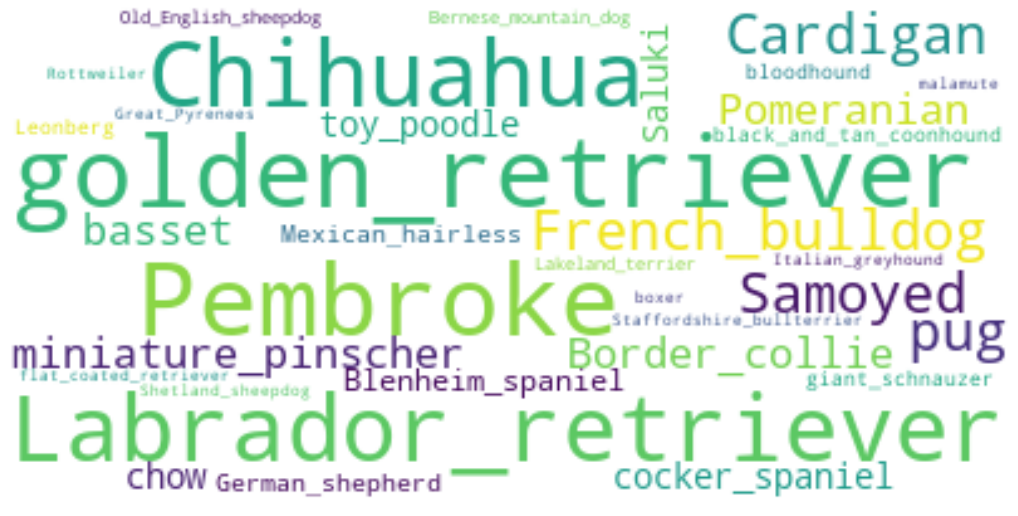

In [99]:
plt.figure(figsize=[18, 18])
wc = WordCloud(min_font_size=6, background_color = "white").generate(breed1)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [100]:
wc.to_file("images/dog_breed.png")

In [101]:
#more data on the dog breed characteristics such as height, weight, hunter/guard/rescuing dog?

_____